# LABORATORIO – SEMANA 11-2 MODELAMIENTO

1. Escoger una data con la que ha estado trabajando u otra nueva y
establecer a la variable “target” (objetivo) lo que se quiere predecir.
Semejante al ejemplo de la inmobiliaria que maneja datos como:
delincuencia, área del terreno, número de habitaciones, etc. y a partir de
ellos quiere predecir el valor medio de la vivienda. Notar que el valor
medio de las viviendas forma parte de su data, se le tiene como un atributo
conocido y es en función de ese atributo conocido que posteriormente va
construir un modelo que prediga este valor.

2. Cada integrante del grupo debe escoger una data diferente, realizar el
mapa de calor y establecer las variables más correlacionadas con el
target. Para la entrega del trabajo grupal terminado, pueden escoger una
de las datas con las que trabajo el grupo.

3. Antes de modelar la data, en el presente laboratorio, va a realizar un
análisis de la correlación de todas las variables, utilizando un mapa de
calor. Con un mapa de calor podemos observar que tan correlacionados
están todos los pares de variables. Sin embargo, nos interesa observar
específicamente, solo algunos. Por ejemplo, en el caso de la inmobiliaria,
solo interesan las correlaciones con el valor medio de la casa, porque es
la variable de respuesta, es lo que desea predecir.

4. Tener presente que los valores de correlación que interesan son donde
hay valores o muy grandes o muy pequeños de correlación (-1:1).

5. Crear un mapa de calor para su data en seaborn con la función heatmap.

6. Identificar las variables que le pueden ayudar en la predicción de su
objetivo.

7. Analizar gráficamente, pero de manera reducida, sólo con las variables
que considera más influyentes en lo que desea predecir. Visualizar los
datos utilizando la función de diagrama de pares de Seaborn, “pairplot”.

8. Presentar conclusiones en base al análisis de correlación de las variables
que ha realizado.

## Prediccion del sobrevivientes del Titanic


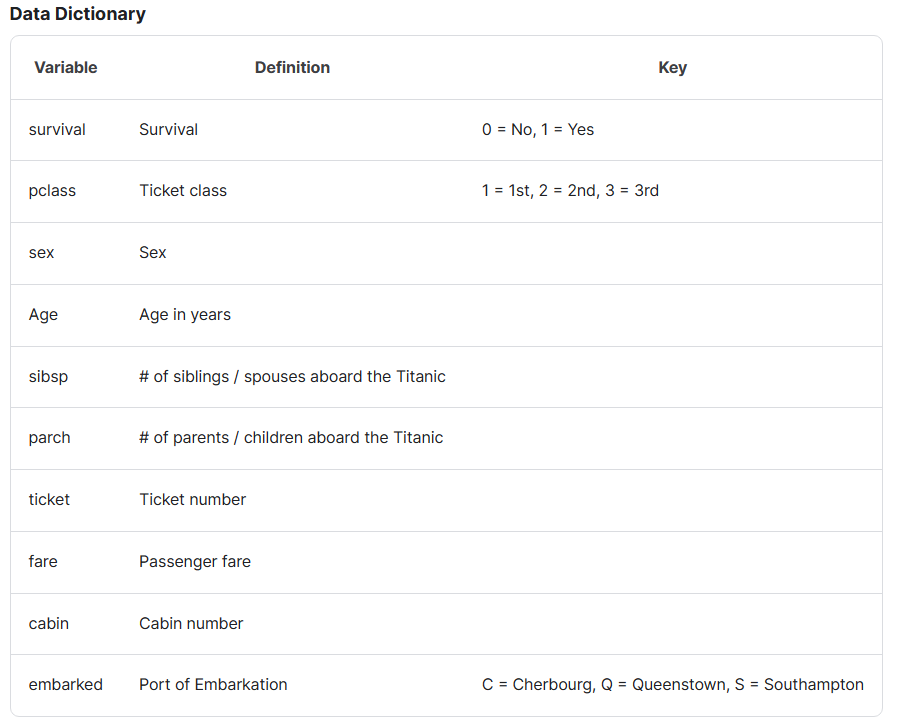

In [10]:
# Data de entrenamiento
# Tenemos como target a Survived que sera la variable a predecir
import pandas as pd
dir_train = '/content/train.csv'
data_train = pd.read_csv(dir_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Realizando el mapa de calor

<ipython-input-3-537d6914a2d4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = data_train.corr()


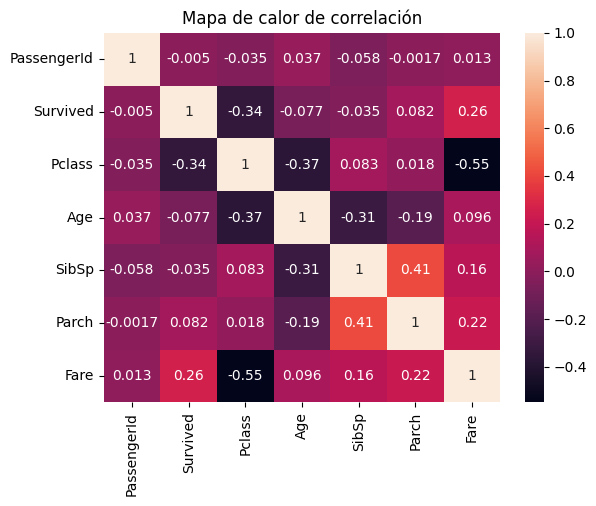

In [3]:


import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
matriz_correlacion = data_train.corr()

# Crear mapa de calor para visualizar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Mapa de calor de correlación')
plt.show()


### Mapa de calor teniendo en cuenta las variables categoricas

In [19]:
df = data_train.drop(['Name','Ticket','Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
# Codificar las variables categóricas utilizando One-Hot Encoding
data_encoded = pd.get_dummies(df)
data_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


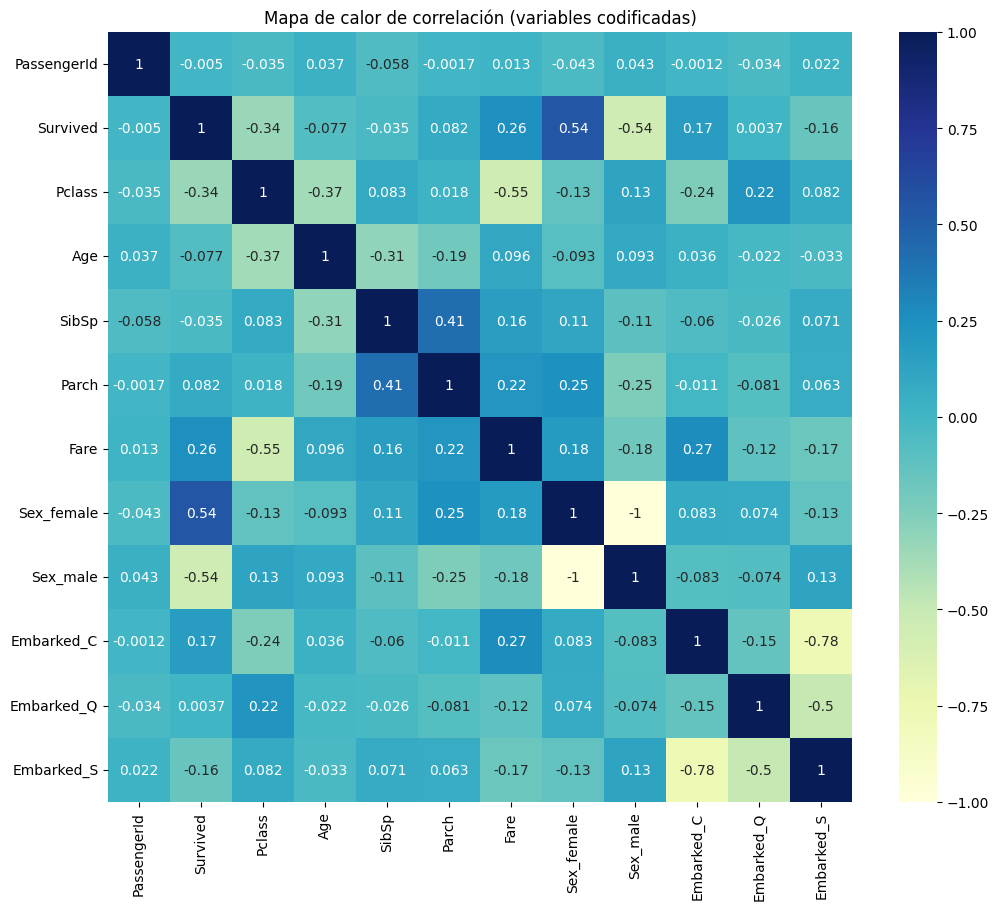

In [22]:
# Calcular la matriz de correlación de rango de Spearman para todas las columnas
matriz_corr = data_encoded.corr()

# Crear mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, cmap='YlGnBu')
plt.title('Mapa de calor de correlación (variables codificadas)')
plt.show()


### Grafica pairplot


Las variable con mayor correlacion con Survived son:
Pclas (-0.34)

* Fare (0.26)
* Sex_female (0.54)
* Sec_male (-0.54)
* Embarked_C (0.17)
* Embarked_S (-0.16)

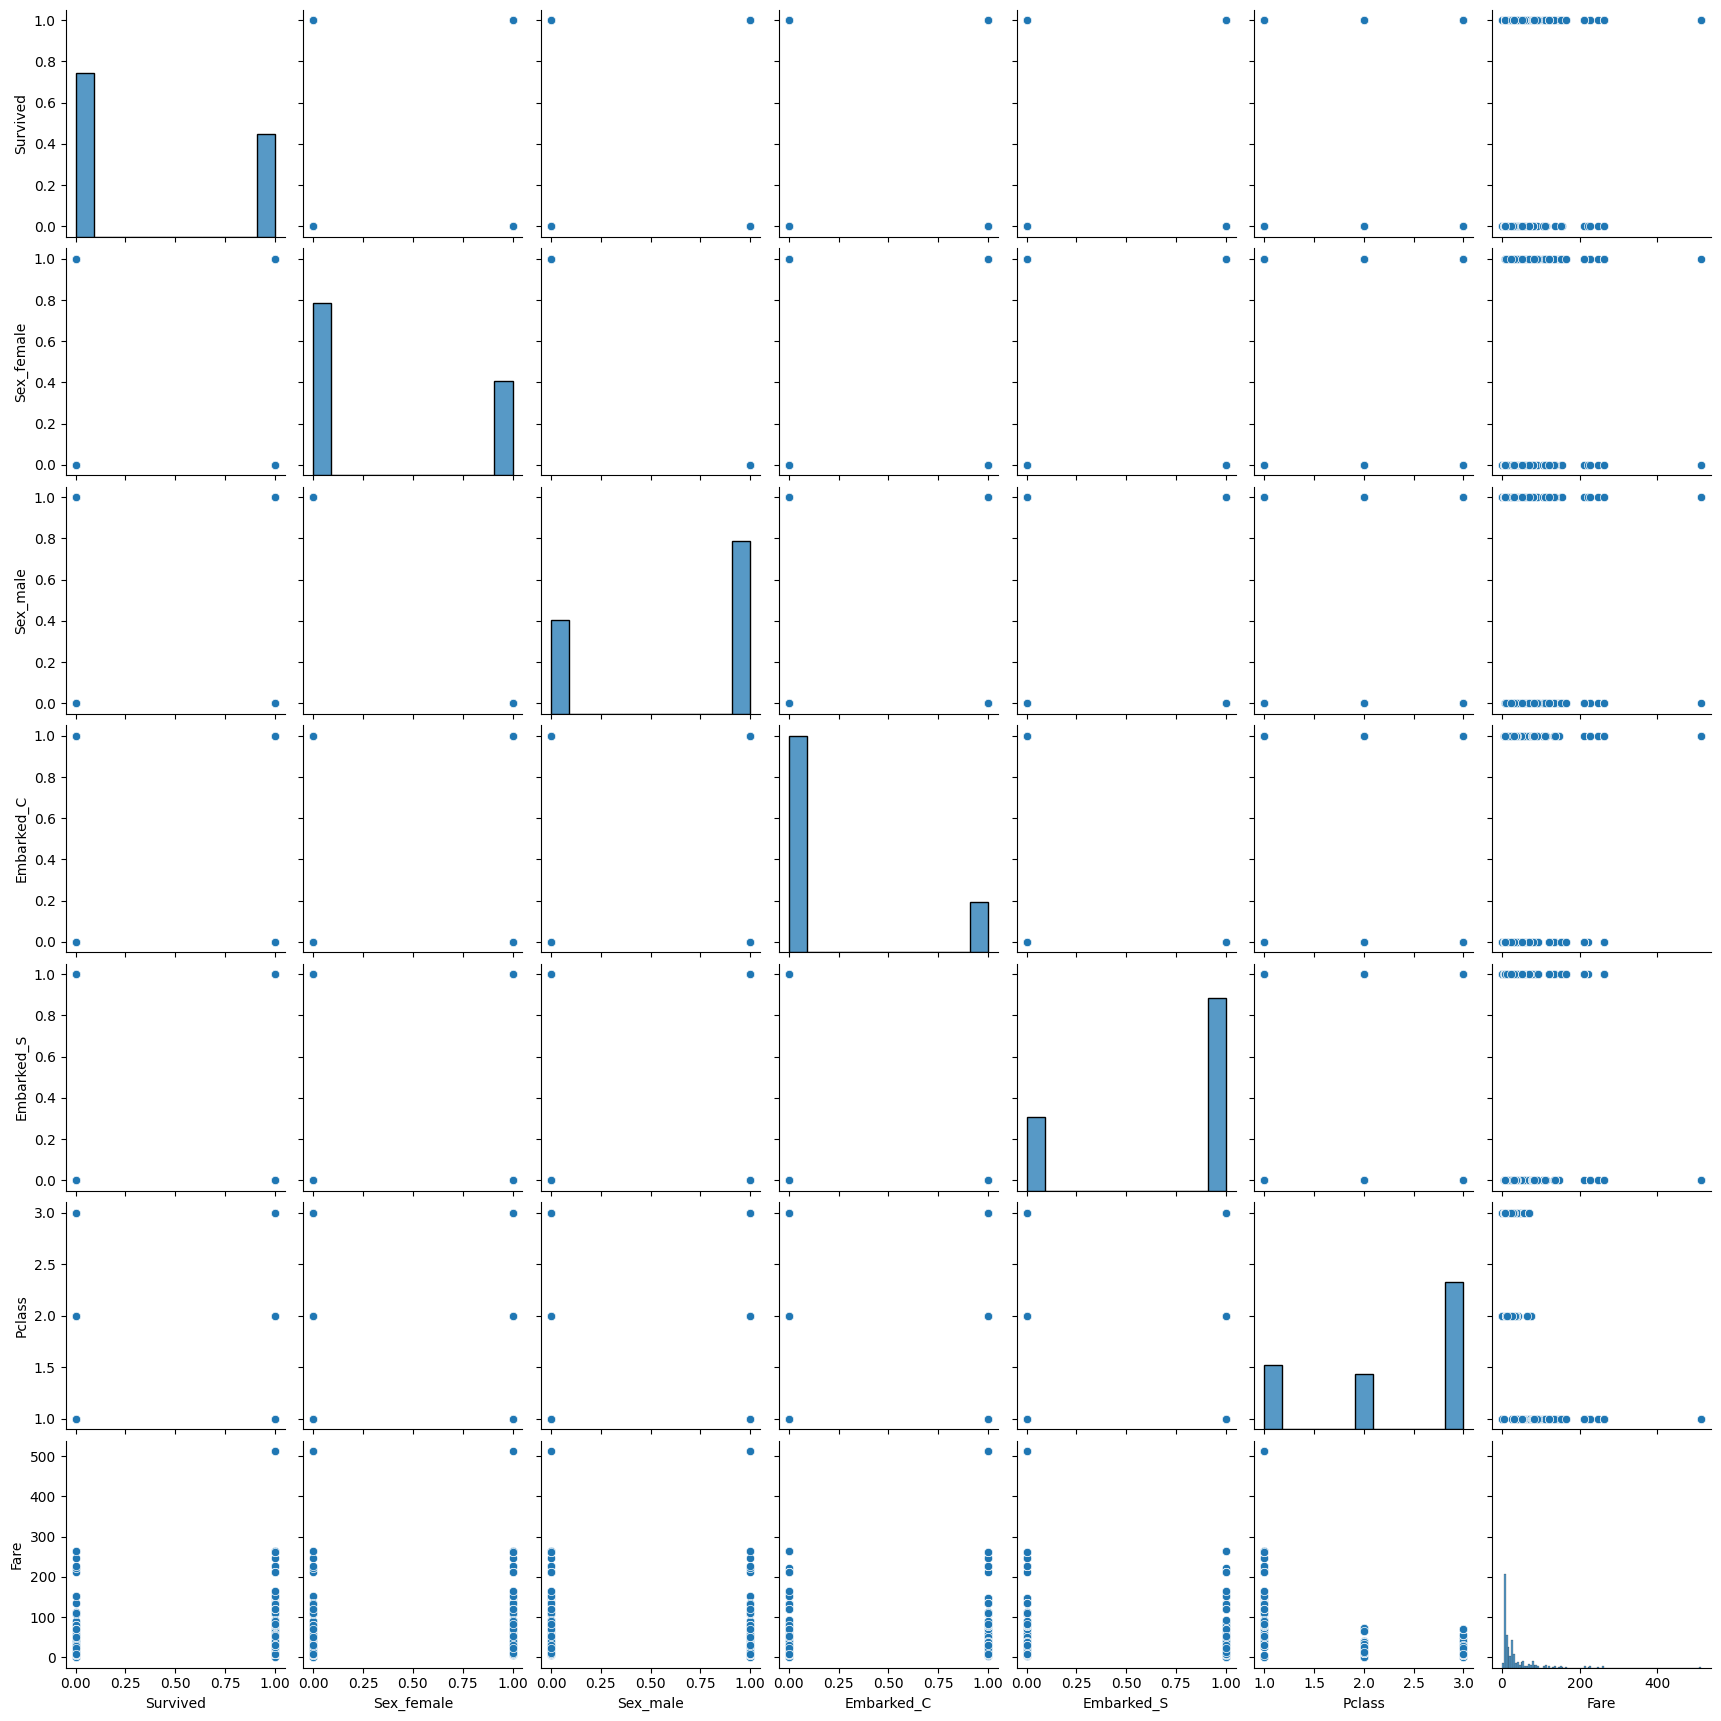

In [33]:

sns.pairplot(data_encoded[['Survived','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Pclass', 'Fare']])
plt.show()

### Preparando el modelo

In [65]:
# las variables con mayor relacion a la target (survived) son sex_female, y relacio inversa sex_male
# tambien se encuentra relaciones no tan fuertes como las anterios tales como embanked C Y embanked S, Pclass, Fare

X_train = data_encoded[['Sex_female','Sex_male','Embarked_C','Embarked_S','Pclass','Fare']]
X_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_S,Pclass,Fare
0,0,1,0,1,3,7.2500
1,1,0,1,0,1,71.2833
2,1,0,0,1,3,7.9250
3,1,0,0,1,1,53.1000
4,0,1,0,1,3,8.0500


In [66]:
y_train = data_encoded[['Survived']]
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [67]:
dir_test = '/content/test.csv'
data_test = pd.read_csv(dir_test)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
data_encoded_test = pd.get_dummies(data_test[['Sex','Embarked','Pclass','Fare']])
data_encoded_test.head()

,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,7.8292,0,1,0,1,0
1,3,7.0000,1,0,0,0,1
2,2,9.6875,0,1,0,1,0
3,3,8.6625,0,1,0,0,1
4,3,12.2875,1,0,0,0,1


In [69]:
X = data_encoded_test[['Sex_female','Sex_male','Embarked_C','Embarked_S','Pclass','Fare']]
X.dropna()

,Sex_female,Sex_male,Embarked_C,Embarked_S,Pclass,Fare
0,0,1,0,0,3,7.8292
1,1,0,0,1,3,7.0000
2,0,1,0,0,2,9.6875
3,0,1,0,1,3,8.6625
4,1,0,0,1,3,12.2875
...,...,...,...,...,...,...
413,0,1,0,1,3,8.0500
414,1,0,1,0,1,108.9000
415,0,1,0,1,3,7.2500
416,0,1,0,1,3,8.0500


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Inicializar el modelo de Regresión Logística
modelo = LogisticRegression()
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
predicciones = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print(f'Precisión del modelo: {precision:.2f}')

Precisión del modelo: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Solucion de NaN de dataset a predecir

Debido a que modelo.predict no permite valores nuloes.
Completamos los valores nulos (NaN) en una columna específica utilizando la información de otros valores de esa columna. Una estrategia común es reemplazar los valores nulos con la media, mediana, moda o cualquier otro valor relevante basado en el contexto de tus datos.

In [76]:
# Contar valores nulos por columna
valores_nulos_por_columna = X.isna().sum()

print(valores_nulos_por_columna)

Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_S    0
Pclass        0
Fare          1
dtype: int64


In [78]:
#identificamos el NaN de Fare
filas_con_nulos_fare = X[X['Fare'].isnull()]
print(filas_con_nulos_fare)

     Sex_female  Sex_male  Embarked_C  Embarked_S  Pclass  Fare
152           0         1           0           1       3   NaN


In [79]:
# Autocompletamoes es NaN
media_fare = X['Fare'].mean()

# Reemplaza los valores nulos en 'Fare' con la media calculada
X['Fare'].fillna(media_fare, inplace=True)


<ipython-input-79-fec057271a57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(media_fare, inplace=True)


In [80]:
#identificamos el NaN de Fare
filas_con_nulos_fare = X[X['Fare'].isnull()]
print(filas_con_nulos_fare)

Empty DataFrame
Columns: [Sex_female, Sex_male, Embarked_C, Embarked_S, Pclass, Fare]
Index: []


### Prediccion

In [84]:
pred = modelo.predict(X)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
data_test['Survived'] = pred
predict_data = data_test[['PassengerId','Survived']]
predict_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [89]:
predict_data.to_csv('pred_v1.csv', index=False)

### score final de prediccion en la competencia de Kaggle 0.75119

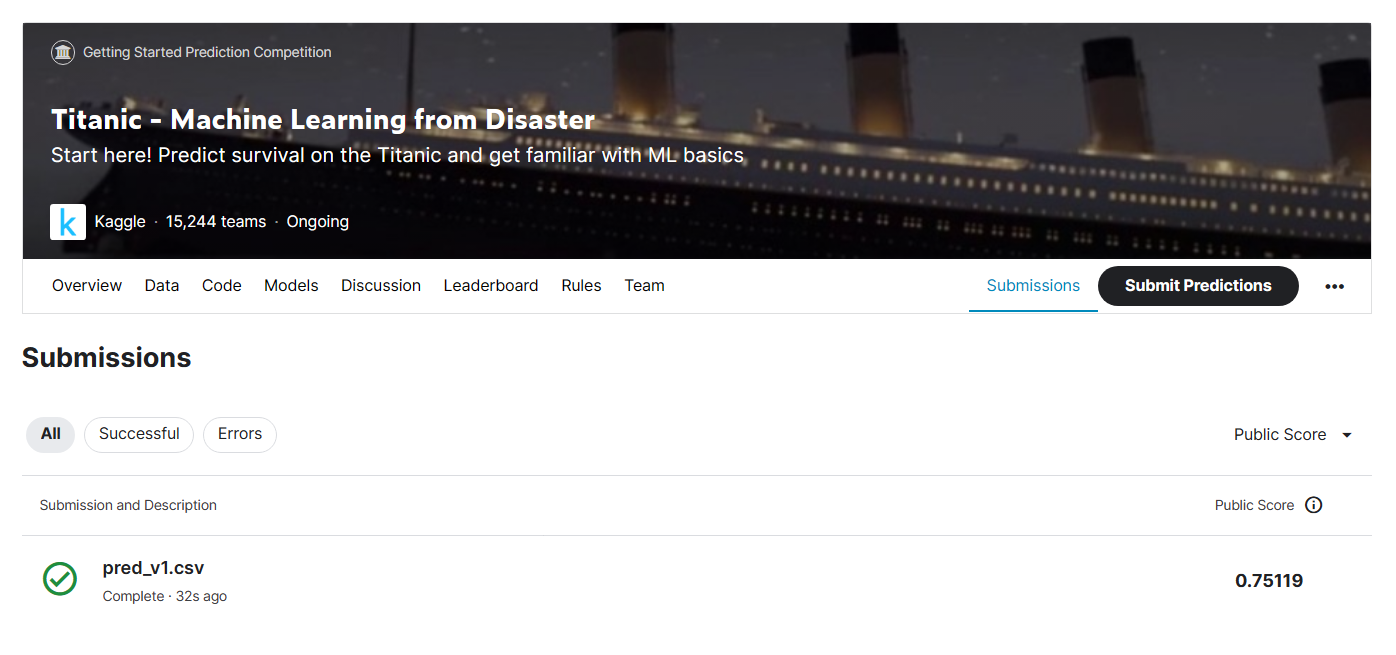